<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/7506R_TP1_GRUPO24_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

In [ ]:
# Imports for notebook

import pandas as pd
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns


plt.style.use('seaborn-v0_8-pastel')

============================== TODO ==============================


-> Ver donde ponemos la Fecha y el ID.

-> Leer el Paper y ver si hay variables irrelevantes.
(Yo creo que sin contar de company el resto si puede llegar a ser util para algo)


-> Que paso con las variables con muchos Nan?

**-> Vivirla en el informe:**

# » Lectura del archivo

In [ ]:
ds_original = pd.read_csv('/content/sample_data/hotels_test.csv')
ds_base = ds_original.copy()

# » Muestra del DataSet


In [ ]:
ds_base.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,No Deposit,30.0,NaN,176,Transient-Party,101.0,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,No Deposit,NaN,NaN,0,Transient,225.0,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,96.0,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,Non Refund,11.0,NaN,0,Transient,30.0,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214


# » Exploración Inicial y filtrado de datos.

Analizando el DataSet, podemos observar que la columna 'company' se encuentra en un gran porcentaje vacía, por lo que se decidió eliminar la columna del DataSet con el fin de dejar lo más limpio posible el archivo y trabajar únicamente con datos que puedan ser relevantes en el trabajo práctico.

In [ ]:
ds_filtrado_company = ds_base['company']

numero_de_NaN_company = ds_filtrado_company.isna().sum()
numero_de_lineas_company = ds_filtrado_company.shape[0]

porcentaje_de_NaN_company = (numero_de_NaN_company/numero_de_lineas_company ) * 100
porcentaje_de_NaN_redondeado_company = round(porcentaje_de_NaN_company, 2)

valores_company = {'numero_de_NaN': [numero_de_NaN_company],
           'numero_de_lineas': [numero_de_lineas_company],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_company]}


df_company = pd.DataFrame.from_dict(valores_company)
df_company.head()



,numero_de_NaN,numero_de_lineas,porcentaje_de_NaN
0,17926,18828,95.21


In [ ]:
ds_filtrado_agent = ds_base['agent']

numero_de_NaN_agent = ds_filtrado_agent.isna().sum()
numero_de_lineas_agent = ds_filtrado_agent.shape[0]

porcentaje_de_NaN_agent = (numero_de_NaN_agent/numero_de_lineas_agent ) * 100
porcentaje_de_NaN_redondeado_agent = round(porcentaje_de_NaN_agent, 2)

valores_agent = {'numero_de_NaN': [numero_de_NaN_agent],
           'numero_de_lineas': [numero_de_lineas_agent],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_agent]}


df_agent = pd.DataFrame.from_dict(valores_agent)
df_agent.head()

,numero_de_NaN,numero_de_lineas,porcentaje_de_NaN
0,2355,18828,12.51


### » Tipos de las varibales

In [ ]:
ds_base.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

### » Separación de variables cuantitativas del DataSet para analizar la media, mediana y moda.

In [ ]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults', 'children','babies',
                                                         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                                                         'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_base.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df

,media,mediana,moda
lead_time,112.23,79.0,0.0
arrival_date_week_number,27.22,27.0,33.0
stays_in_weekend_nights,0.94,1.0,0.0
adults,1.87,2.0,2.0
children,0.10,0.0,0.0
babies,0.01,0.0,0.0
is_repeated_guest,0.03,0.0,0.0
previous_cancellations,0.11,0.0,0.0
previous_bookings_not_canceled,0.11,0.0,0.0
booking_changes,0.20,0.0,0.0


In [ ]:
round(ds_cuantitativo.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,18828.0,112.23,110.05,0.0,24.0,79.0,171.0,737.0
arrival_date_week_number,18828.0,27.22,13.46,1.0,17.0,27.0,38.0,53.0
stays_in_weekend_nights,18828.0,0.94,1.02,0.0,0.0,1.0,2.0,14.0
adults,18828.0,1.87,0.66,0.0,2.0,2.0,2.0,50.0
children,18828.0,0.10,0.39,0.0,0.0,0.0,0.0,3.0
babies,18828.0,0.01,0.11,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,18828.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0
previous_cancellations,18828.0,0.11,0.91,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,18828.0,0.11,1.43,0.0,0.0,0.0,0.0,68.0
booking_changes,18828.0,0.20,0.67,0.0,0.0,0.0,0.0,21.0


### » Separación de las variables cualitativas y análisis.

In [ ]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type', 'deposit_type',
                                 'customer_type']

ds_cualitativo = ds_base.loc[:, nombre_variables_cualitativas]


### » Cantidad de valores posibles dentro del DataSet con variables cualitativas unicamente:


In [ ]:
ds_cualitativo.nunique().sort_values(ascending=True)


hotel                     2
deposit_type              3
distribution_channel      4
customer_type             4
meal                      5
market_segment            7
reserved_room_type       10
assigned_room_type       11
arrival_date_month       12
country                 128
dtype: int64

### » Frecuencia de los valores
Los numeros representan el porcentaje de aparacion de esa variable.

- Hoteles.

In [ ]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.96
Resort Hotel    31.04
Name: hotel, dtype: float64


- **Tipo de depósito.**

In [ ]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.46
Non Refund    16.44
Refundable     0.10
Name: deposit_type, dtype: float64


- **Canal de distribución.**

In [ ]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.92
Direct       10.99
Corporate     4.97
GDS           0.12
Name: distribution_channel, dtype: float64

- **Tipo de cliente.**


In [ ]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.57
Transient-Party    19.75
Contract            3.36
Group               0.32
Name: customer_type, dtype: float64

- **Comida.**

In [ ]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.59
HB           11.70
SC            8.98
Undefined     0.95
FB            0.79
Name: meal, dtype: float64

- **Segmento de mercado (método de reserva).**

In [ ]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 2)

Online TA        47.05
Offline TA/TO    20.06
Groups           19.03
Direct            9.36
Corporate         3.88
Complementary     0.48
Aviation          0.14
Name: market_segment, dtype: float64

- **Mes de llegada**

In [ ]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.87
July         10.40
May           9.93
April         9.69
June          9.65
October       9.35
September     8.87
March         7.97
February      6.44
December      5.59
November      5.53
January       4.72
Name: arrival_date_month, dtype: float64

- **País**

In [ ]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.275276
GBR     9.166978
FRA     8.010446
ESP     6.470181
DEU     5.287001
         ...    
PAK     0.005330
TZA     0.005330
ATF     0.005330
IRQ     0.005330
BFA     0.005330
Name: country, Length: 128, dtype: float64

## » Varibles ordinales
Los numeros representan el porcentaje de aparacion de esa variable.

In [ ]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = ds_base.loc[:, nombre_variables_ordinales]

- **Tipo de habitación reservada.**

In [ ]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 2)

A    72.74
D    15.88
E     5.09
F     2.45
G     1.72
B     0.89
C     0.80
H     0.40
L     0.02
P     0.01
Name: reserved_room_type, dtype: float64

- **Tipo de habitación asignada**

In [ ]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 2)

A    64.57
D    20.24
E     5.95
F     2.95
G     1.99
C     1.69
B     1.66
H     0.47
I     0.24
K     0.22
P     0.01
Name: assigned_room_type, dtype: float64

Text(0, 0.5, 'Porcentaje')

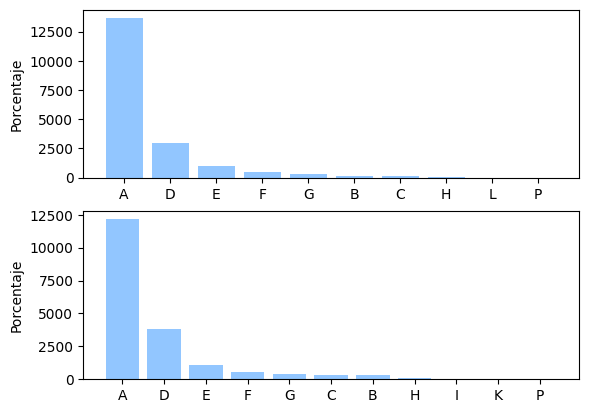

In [ ]:
## QUEDA COMPLETAR EL GRAFICO CON %
plt.subplot(2,1,1)

a = plt.bar(ds_ordinales['reserved_room_type'].value_counts().index, ds_ordinales['reserved_room_type'].value_counts())
plt.ylabel('Porcentaje')


plt.subplot(2,1,2)

b= plt.bar(ds_ordinales['assigned_room_type'].value_counts().index, ds_ordinales['assigned_room_type'].value_counts())
plt.ylabel('Porcentaje')


# » Análisis gráfico de las distribuciones de las variables.

-  **Meses**


En el siguiente gráfico podemos observar cuales son los meses con mayor actividad de reserva en la totalidad de los hoteles.

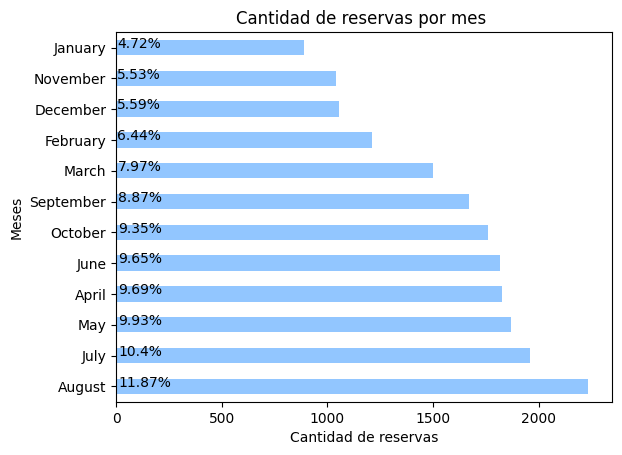

In [ ]:

grafico_distribucion_meses = ds_cualitativo['arrival_date_month'].value_counts().plot.barh(alpha=1, title="Cantidad de reservas por mes ",xlabel='Cantidad de reservas',ylabel='Meses')

valores_barras = round(ds_cualitativo['arrival_date_month'].value_counts(normalize = True) * 100, 2)


for index, value in enumerate(valores_barras):
    plt.text(value, index, str(value) +"%")


- **Hoteles**

En el grafico a continuacion se logra observar el porcentaje en que se realizan reservas en cada hotel.

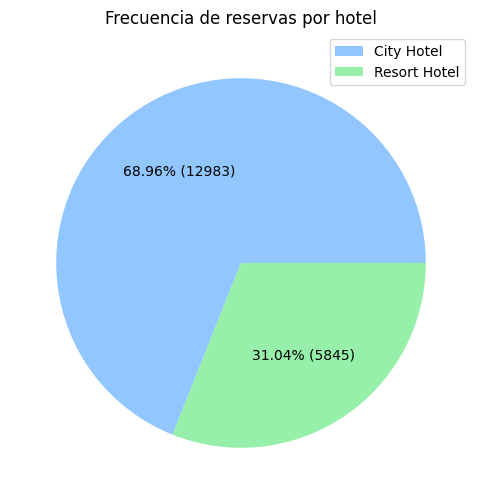

In [ ]:

hoteles = ds_cualitativo.hotel.value_counts()

df = pd.DataFrame(hoteles)

valores = df['hotel']
categoria = df.index

plt.figure(figsize=(6, 6))

plt.pie(valores, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)
plt.title('Frecuencia de reservas por hotel')

plt.legend(labels=categoria, loc="best")


plt.show()

- **Tipo de deposito**

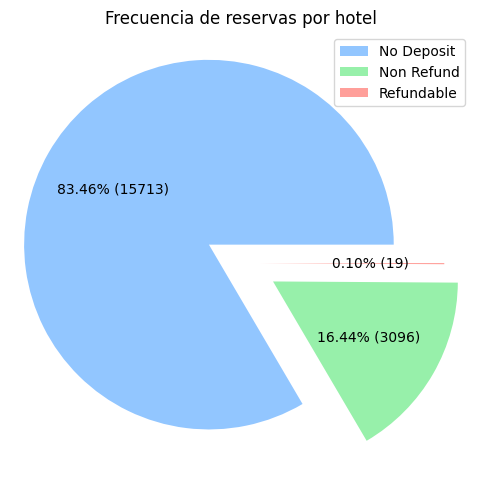

In [ ]:
tipo_deposito = ds_cualitativo.deposit_type.value_counts()

df = pd.DataFrame(tipo_deposito)

valores = df['deposit_type']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0.2, 0.2, 0.1) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Frecuencia de reservas por hotel')

plt.legend(labels=categoria,loc="upper right")


plt.show()



- **Canal de distribucion**

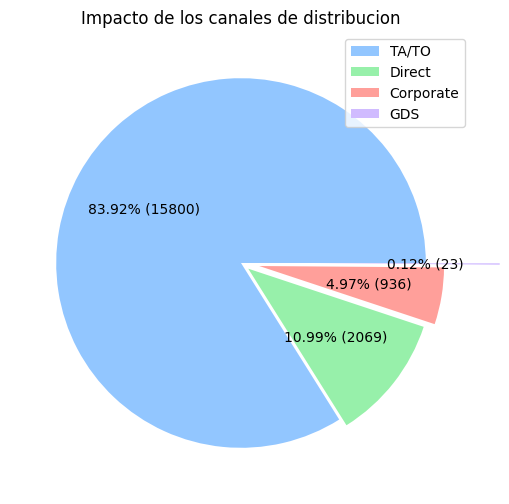

In [ ]:
tipos_de_canales = ds_cualitativo.distribution_channel.value_counts()

df = pd.DataFrame(tipos_de_canales)

valores = df['distribution_channel']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.05, 0.1, 0.4) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Impacto de los canales de distribucion')

plt.legend(labels=categoria,loc="upper right")

plt.show()



- **Tipo de cliente**

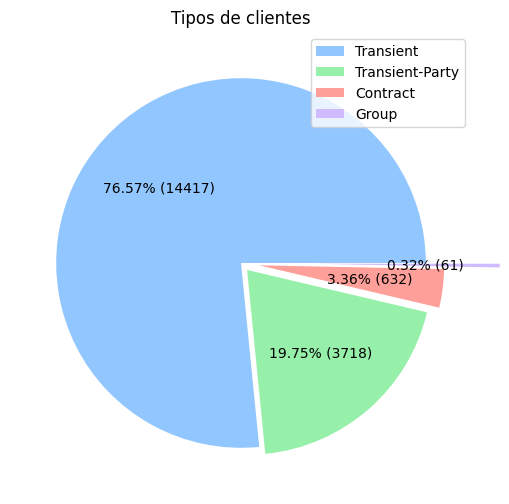

In [ ]:
tipos_de_clientes = ds_cualitativo.customer_type.value_counts()

df = pd.DataFrame(tipos_de_clientes)

valores = df['customer_type']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.05, 0.1, 0.4) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Tipos de clientes')

plt.legend(labels=categoria,loc="upper right")


plt.show()


- **Comida**

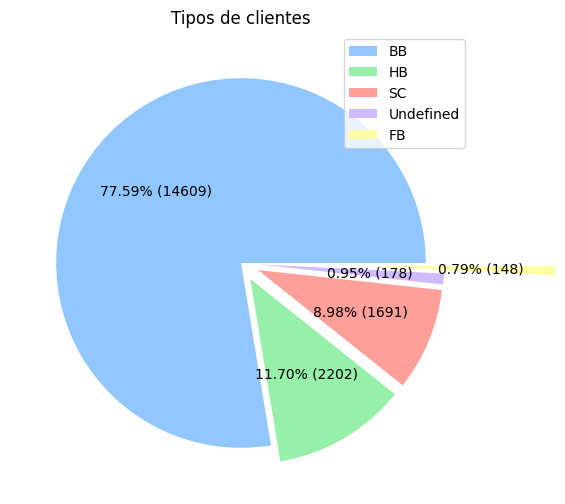

In [ ]:
tipos_de_comidas = ds_cualitativo.meal.value_counts()

df = pd.DataFrame(tipos_de_comidas)

valores = df['meal']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.1, 0.1, 0.1, 0.7),autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Tipos de clientes')

plt.legend(labels=categoria,loc="upper right")


plt.show()


- **Segmento de mercado**

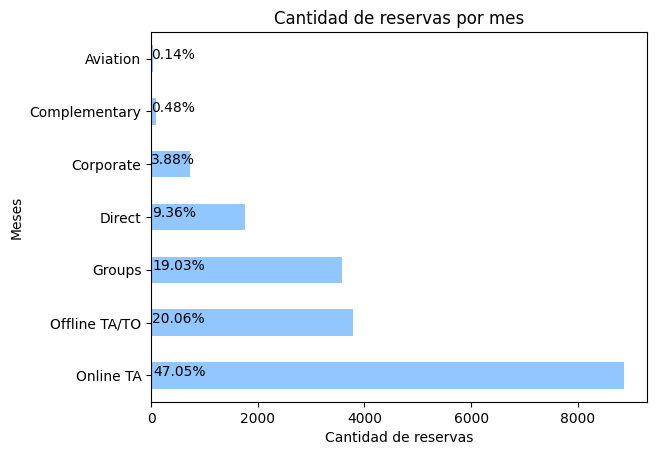

In [ ]:

grafico_distribucion_meses = ds_cualitativo['market_segment'].value_counts().plot.barh(alpha=1, title="Cantidad de reservas por mes",xlabel='Cantidad de reservas',ylabel='Meses')
valores_barras = round(ds_cualitativo['market_segment'].value_counts(normalize = True) * 100, 2)


for index, value in enumerate(valores_barras):
    plt.text(value, index, str(value) +"%")


- **Tipos de clienteS**



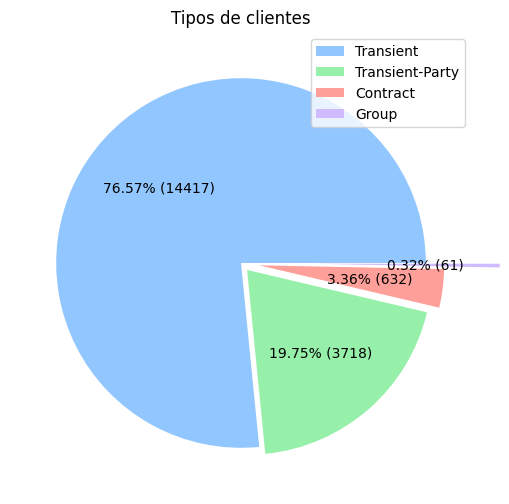

In [ ]:
tipos_de_clientes = ds_cualitativo.customer_type.value_counts()

df = pd.DataFrame(tipos_de_clientes)

valores = df['customer_type']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.05, 0.1, 0.4) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Tipos de clientes')

plt.legend(labels=categoria,loc="upper right")


plt.show()

- **Paises con mas reservas en los hoteles**

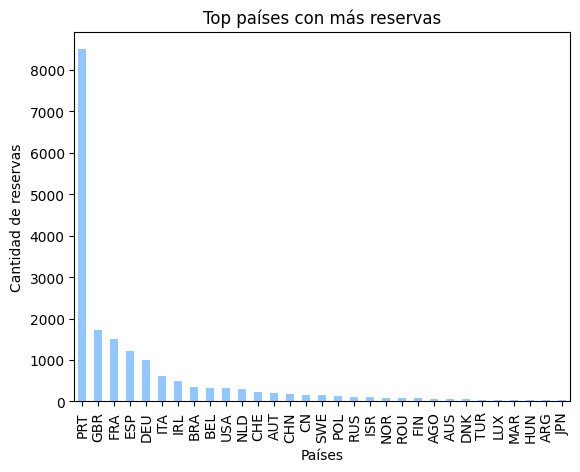

In [ ]:

top_paises = ds_cualitativo['country'].value_counts().head(31)
paises = top_paises.plot.bar(alpha=1, title="Top países con más reservas", xlabel='Países', ylabel='Cantidad de reservas')


# » Grafico de los valores atipicos

- **Cantidad de adultos por habitacion**

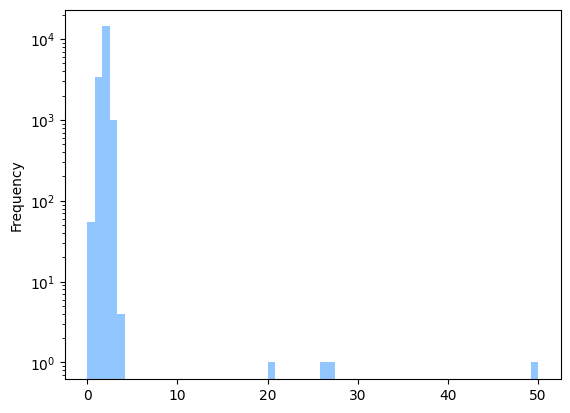

In [ ]:

grf = ds_base.adults.plot(kind = 'hist', bins= 60, log=True, ylabel='Cantidad')


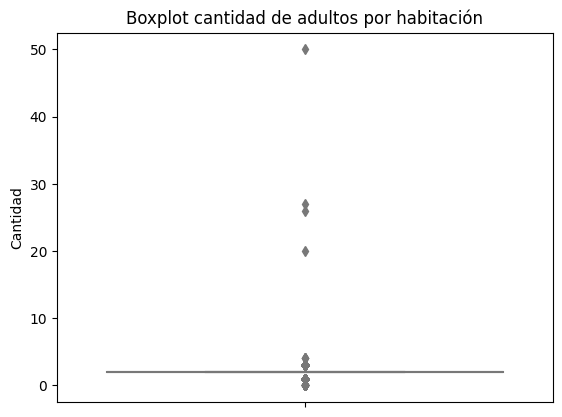

In [ ]:
grf = sns.boxplot(y=ds_base.adults, data= ds_base ).set(title="Boxplot cantidad de adultos por habitación",xlabel="",ylabel="Cantidad")

- **Estadia los fines de semana en el hotel**

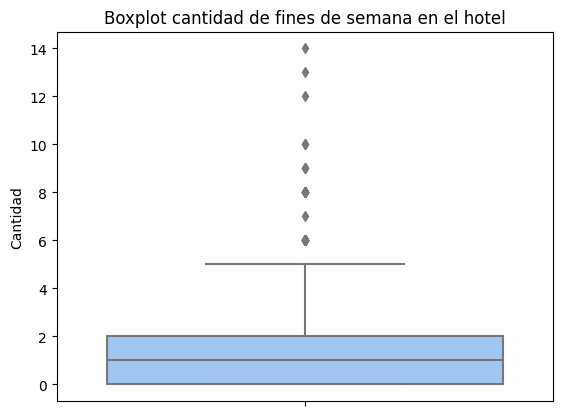

In [ ]:
grf = sns.boxplot(y=ds_base.stays_in_weekend_nights, data= ds_base).set(title="Boxplot cantidad de fines de semana en el hotel",xlabel="",ylabel="Cantidad")

- **Cantidad de bebes en cada familia**

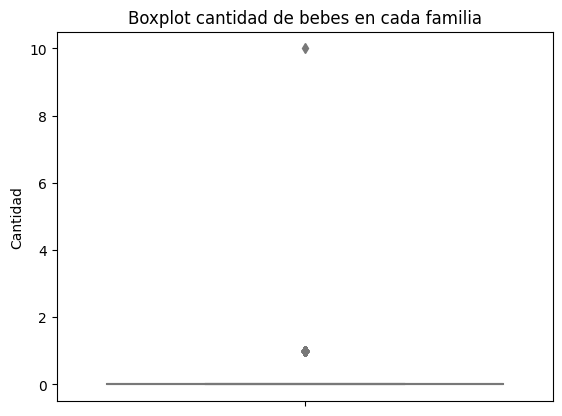

In [ ]:
grf = sns.boxplot(y=ds_base.babies, data= ds_base).set(title="Boxplot cantidad de bebes en cada familia",xlabel="",ylabel="Cantidad")

- **Cancelaciones previas de la habitacion**

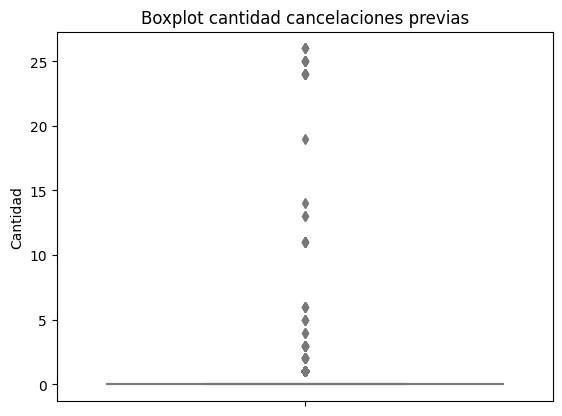

In [ ]:
grf = sns.boxplot(y=ds_base.previous_cancellations, data= ds_base).set(title="Boxplot cantidad cancelaciones previas",xlabel="",ylabel="Cantidad")

- **Dias en la lista de espera**

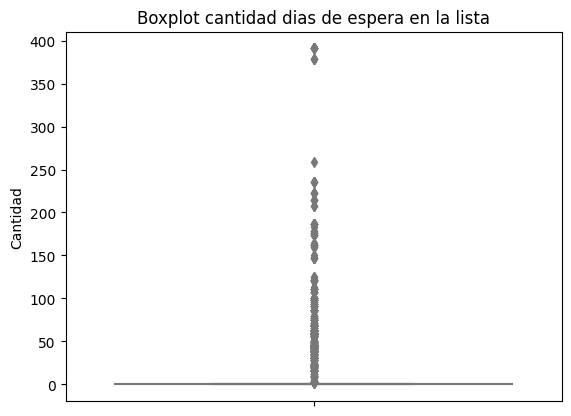

In [ ]:
grf = sns.boxplot(y = ds_base.days_in_waiting_list, data = ds_base).set(title="Boxplot cantidad dias de espera en la lista",xlabel="",ylabel="Cantidad")

- **ADR**

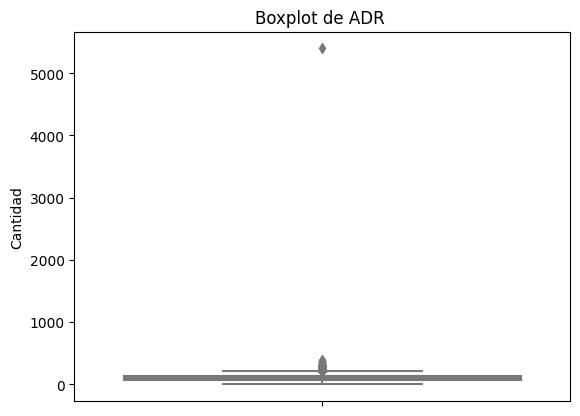

In [ ]:
grf = sns.boxplot(y= ds_base.adr, data= ds_base ).set(title="Boxplot de ADR ",xlabel="",ylabel="Cantidad")

# » Análisis de las correlaciones entre las variables.


In [ ]:
ds_base.corr(numeric_only = True)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.014615,0.134514,-0.014408,0.048615,0.114636,0.108978,-0.045816,-0.014402,-0.116414,0.094677,-0.068406,-0.008973,-0.080832,0.154839,0.156247,-0.081783,-0.117923,-0.118826
arrival_date_year,0.014615,1.000000,-0.535921,-0.004959,0.011321,0.028757,0.025257,0.066108,-0.008087,-0.011738,-0.142130,0.021689,0.030672,0.069955,0.261038,-0.053877,0.177216,-0.012944,0.095302
arrival_date_week_number,0.134514,-0.535921,1.000000,0.057960,0.029955,0.011680,0.015680,-0.002384,-0.000019,-0.032807,0.044145,-0.023662,0.002603,-0.024067,-0.036190,0.014218,0.045807,-0.009119,0.029097
arrival_date_day_of_month,-0.014408,-0.004959,0.057960,1.000000,-0.021666,-0.035244,-0.011343,0.020845,-0.002234,-0.001993,-0.024726,-0.005076,0.013749,-0.001484,0.047228,0.005074,0.032654,0.007849,-0.008379
stays_in_weekend_nights,0.048615,0.011321,0.029955,-0.021666,1.000000,0.509380,0.066190,0.063758,0.008833,-0.069377,-0.010609,-0.036251,0.108741,0.152941,0.046226,-0.055639,0.037337,-0.005681,0.079586
stays_in_week_nights,0.114636,0.028757,0.011680,-0.035244,0.509380,1.000000,0.069824,0.051875,0.015407,-0.086344,-0.010254,-0.042256,0.140408,0.190220,0.203654,-0.009352,0.047263,-0.007721,0.080207
adults,0.108978,0.025257,0.015680,-0.011343,0.066190,0.069824,1.000000,0.021337,0.009741,-0.117577,-0.003868,-0.081678,-0.033396,-0.035226,0.201482,-0.012076,0.146463,0.011028,0.096247
children,-0.045816,0.066108,-0.002384,0.020845,0.063758,0.051875,0.021337,1.000000,0.020241,-0.033799,-0.027934,-0.017387,0.029449,0.042785,-0.031592,-0.035068,0.270709,0.044403,0.073303
babies,-0.014402,-0.008087,-0.000019,-0.002234,0.008833,0.015407,0.009741,0.020241,1.000000,-0.001834,-0.007063,-0.004460,0.060421,0.027848,0.014928,-0.008881,0.011569,0.034836,0.084358
is_repeated_guest,-0.116414,-0.011738,-0.032807,-0.001993,-0.069377,-0.086344,-0.117577,-0.033799,-0.001834,1.000000,0.077824,0.393667,0.012056,0.010884,-0.241004,-0.021435,-0.101241,0.084765,0.019696


<Axes: >

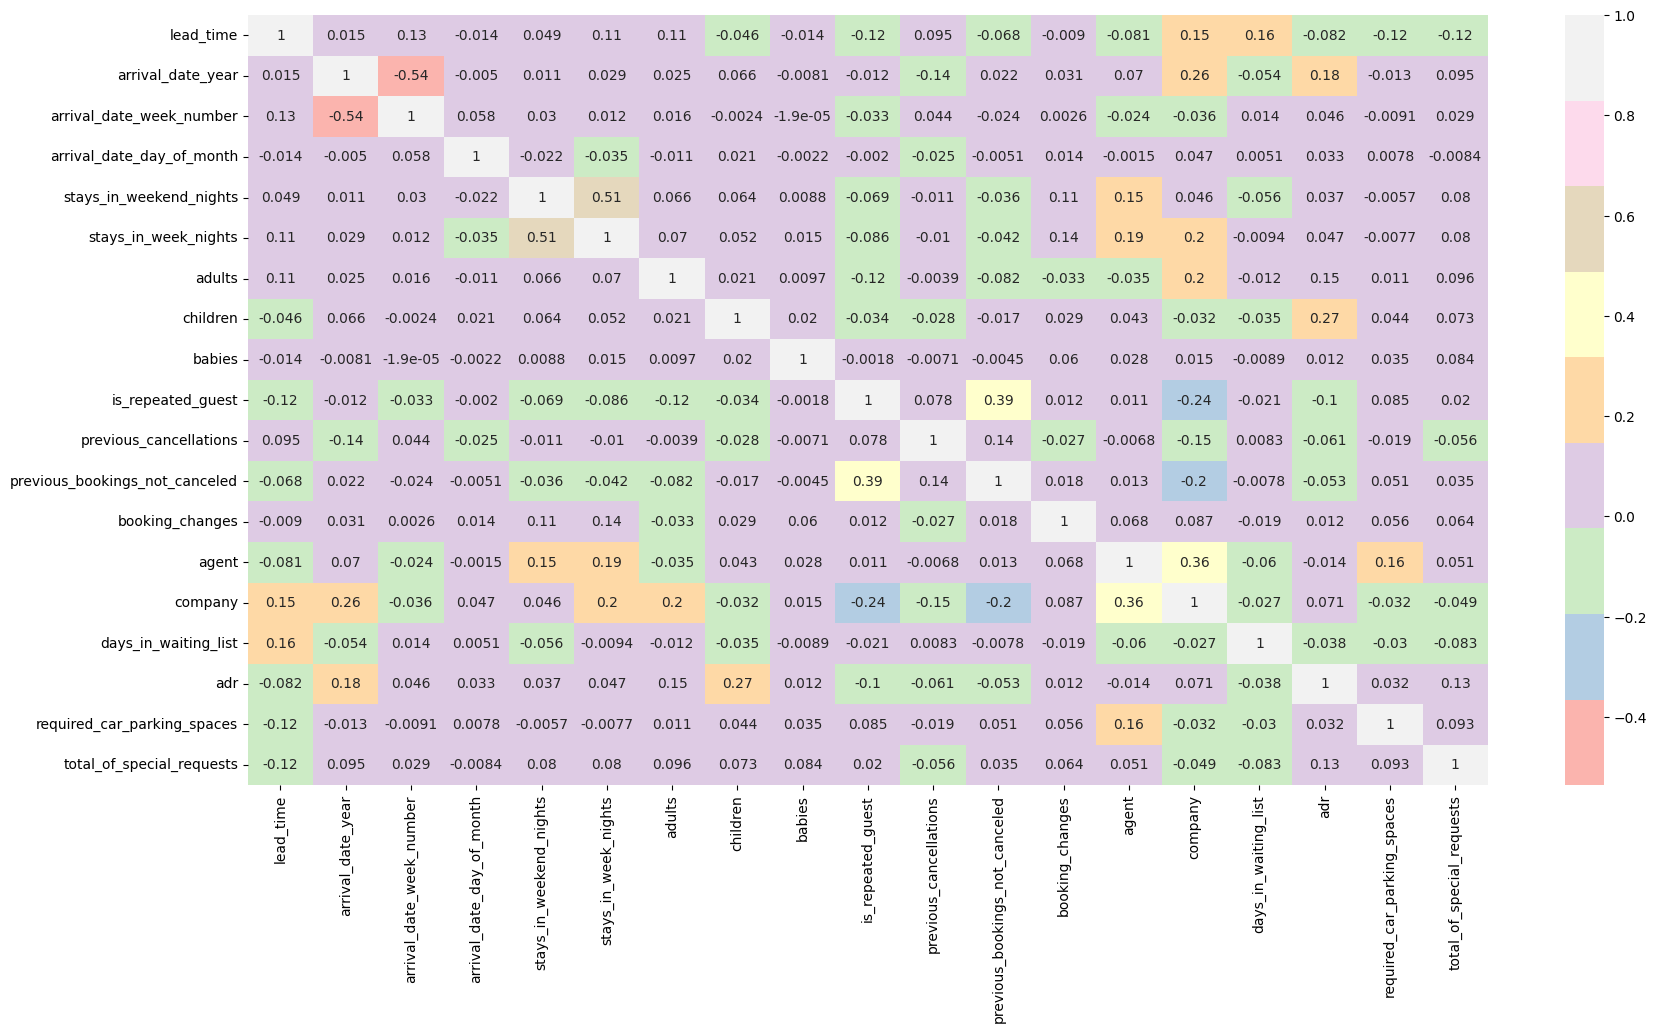

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(ds_base.corr(numeric_only = True),annot = True, cmap= "Pastel1")

# » Analisis de nulos en el DataSet

- **Grafico de porcenataje de nulos de todas las variables**

Procederemos a calcular el porcentaje de valores nulos por columna. Esta información nos sera muy útil para tomar decisiones individuales sobre cómo abordar estos valores nulos en cada caso específico.


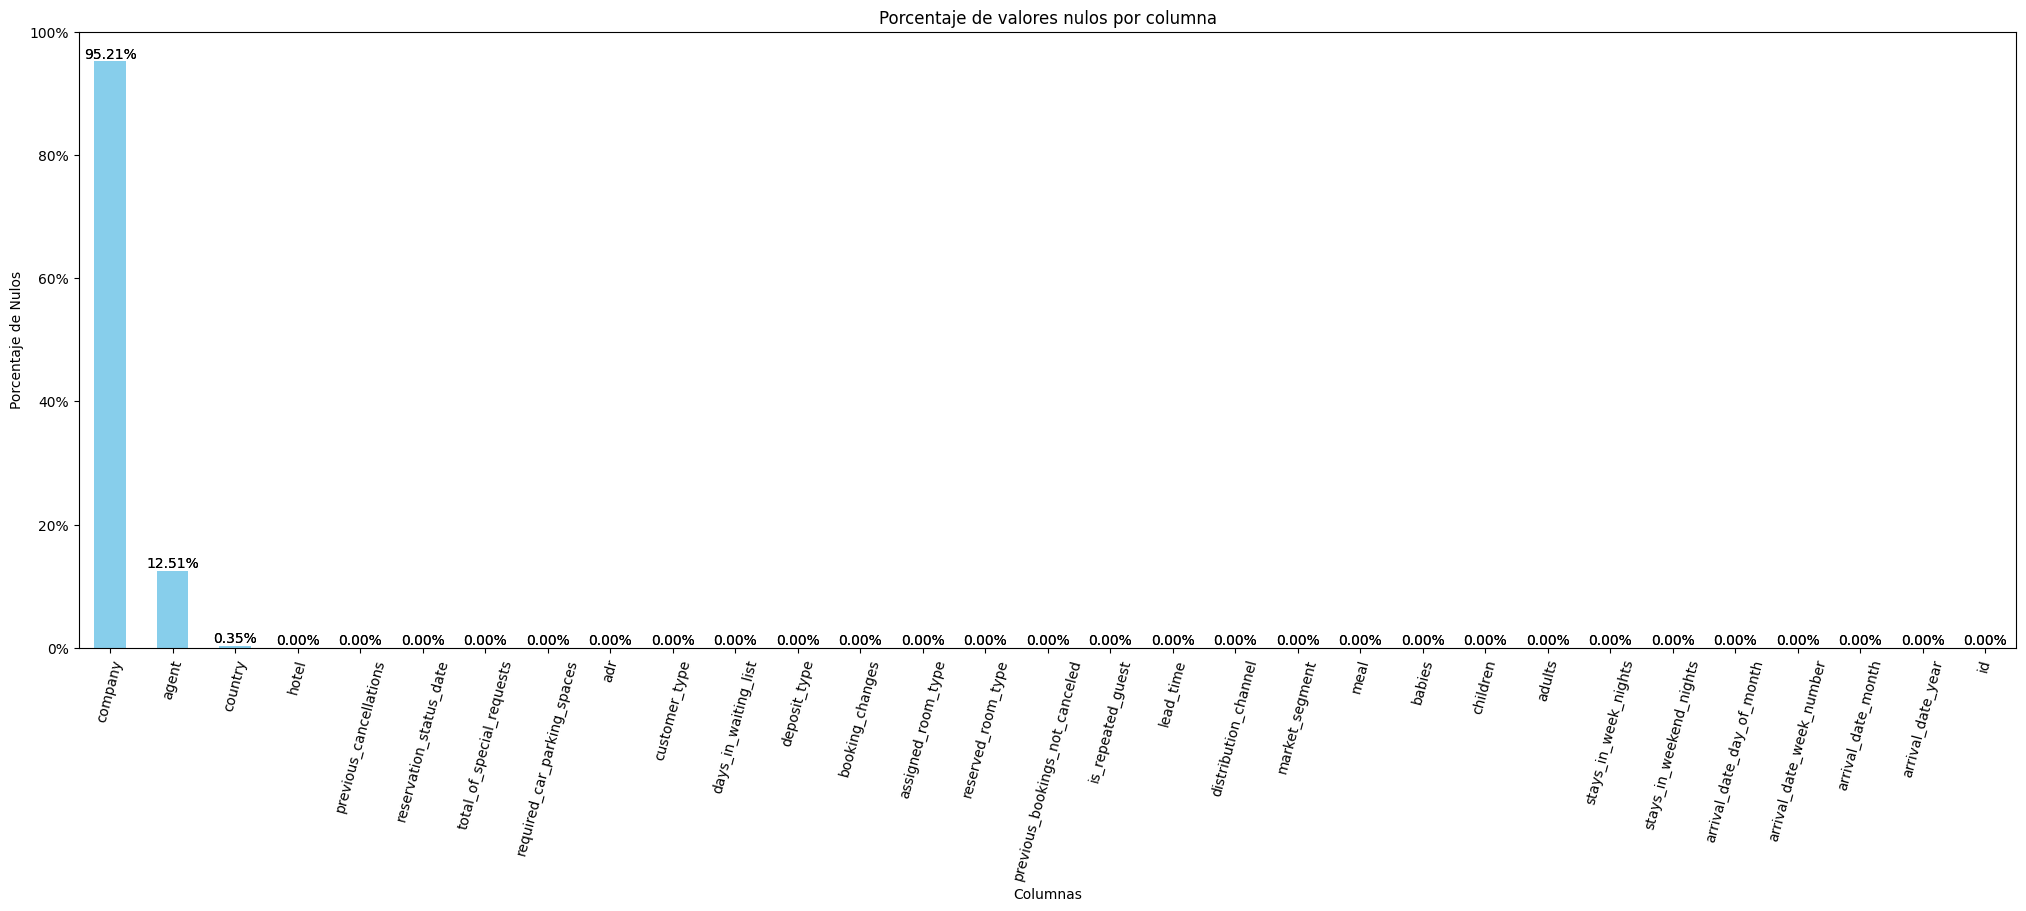

In [ ]:
porcentaje_nulos = (ds_original.isnull().sum() / len(ds_original)) * 100
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)
plt.figure(figsize=(25, 8))
ax = porcentaje_nulos.plot(kind='bar', color='skyblue')

porcentaje_nulos.plot(kind='bar', color='skyblue')#,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()))
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos')
plt.xticks(rotation=75)
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

Primero decidimos en la columna agent reemplazar los valores Nan con ceros.
Luego, tomamos la decision de unir las columnas company y agent ya que describen el ID y la columna company tenia un alto porcentaje de valores NULL. En el caso que un registro no tuviera NULL en las dos columnas, decidimos dejar el valor de company.

Reemplazamos los valores NULL en la columna country con 'Undefined'
para ..

In [ ]:
ds_copia = ds_original.copy()
###agregar una C a los que sean company
ds_unificado = pd.DataFrame(ds_copia)

ds_unificado.agent.fillna(0, inplace=True)

ds_unificado['agent_company'] = ds_unificado['company'].fillna(ds_unificado['agent'])
ds_unificado = ds_unificado.drop(['company', 'agent'], axis=1)

ds_unificado.isna().any()

hotel                             False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False
adr                               False


Mostramos la cantidad de valores NaN previo a la imputacion de la columna country

In [ ]:
ds_filtrado_agent = ds_base['country']

numero_de_NaN_agent = ds_filtrado_agent.isna().sum()
numero_de_lineas_agent = ds_filtrado_agent.shape[0]

porcentaje_de_NaN_agent = (numero_de_NaN_agent/numero_de_lineas_agent ) * 100
porcentaje_de_NaN_redondeado_agent = round(porcentaje_de_NaN_agent, 2)

valores_agent = {'numero_de_NaN': [numero_de_NaN_agent],
           'numero_de_lineas': [numero_de_lineas_agent],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_agent]}


df_agent = pd.DataFrame.from_dict(valores_agent)
df_agent.head()

,numero_de_NaN,numero_de_lineas,porcentaje_de_NaN
0,65,18828,0.35


Asi quedaria la distribucion de country luego de la imputacion

   numero_de_NaN  numero_de_lineas  porcentaje_de_NaN
0             65             18828               0.35


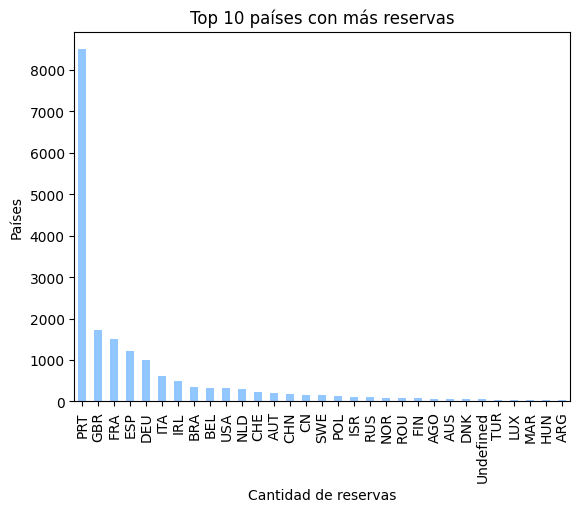

In [ ]:
ds_filtrado_agent = ds_unificado['country']

numero_de_NaN_agent = ds_filtrado_agent.isna().sum()
numero_de_lineas_agent = ds_filtrado_agent.shape[0]

porcentaje_de_NaN_agent = (numero_de_NaN_agent/numero_de_lineas_agent ) * 100
porcentaje_de_NaN_redondeado_agent = round(porcentaje_de_NaN_agent, 2)

valores_agent = {'numero_de_NaN': [numero_de_NaN_agent],
           'numero_de_lineas': [numero_de_lineas_agent],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_agent]}


df_agent = pd.DataFrame.from_dict(valores_agent)
print(df_agent)

ds_unificado.country.fillna('Undefined', inplace=True)

top_10_paises = ds_unificado['country'].value_counts().head(31)
paises = top_10_paises.plot.bar(alpha=1, title="Top 10 países con más reservas", xlabel='Cantidad de reservas', ylabel='Países')


In [ ]:
print("Hay valores NULL? :" , ds_unificado.country.isna().any())


Hay valores NULL? : False
